<a href="https://colab.research.google.com/github/Yashasvi-Shukl/Statistics/blob/main/Confidence_Interval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before we know how to estimate that lets have a look at couple of concepts
<h3>1. <font color='blue'><a href='https://en.wikipedia.org/wiki/Standard_error'>Standard error</a> </font> </h3>
<pre>
 
<li>The standard error (SE) of a statistic (usually an estimate of a parameter) is the standard deviation of its sampling distribution or an estimate of that standard deviation.</li>
<li>If the parameter or the statistic is the mean, it is called the standard error of the mean (SEM). </li>
<li>The standard error of the mean (SEM) can be expressed as: </li>
</pre>
$$\sigma_\overline{x}=\frac{\sigma}{\sqrt{n}}$$
<pre>
Since the population standard deviation is seldom known, the standard error of the mean(SEM) is usually estimated as the sample standard deviation divided by the square root of the sample size (assuming statistical independence of the values in the sample).
</pre>
$${\displaystyle {\sigma }_{\bar {x}}\ \approx {\frac {s}{\sqrt {n}}}} $$


<h3>2. <font color='blue'> $zScore$</font> and Confidence Levels:</h3>

<ul>
    <li>Let $\alpha$ be a number between 0 and 1, and let 100 * (1 – $\alpha$)% denote the confidence level.
    <br>For example, 
        <ul>
        <li>if $\alpha$ = 0.05, then the corresponding confidence level is 95%. </li>
        <li>If $\alpha$= 0.01, then the confidence level is 99%.</li>
        </ul>
    </li>
    <li>
        Suppose we have a standard normal distribution $Z$. <br>Let $z_\frac{\sigma}{2}$ denote a $zScore$ with α/2 probability to its right. <br>Similarly let -$z_\frac{\sigma}{2}$ denote a $zScore$ with α/2 probability to its left.
    </li>
    <li> Example: <img src='https://i.imgur.com/mntg6h2.png' width=700>
        The value $z_{0.10}$ is the positive z-score that has α/2 = 0.1 probability to its right. The desired $zScore$ is 1.282. <br>The value $-z_{0.25}$ is the negative z-score that has α/2 = 0.25 probability to its left. The
desired $zScore$ is -0.6745.

</ul>



In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import random
from prettytable import PrettyTable

In [2]:
!wget https://raw.githubusercontent.com/mathubhalan/Black-Friday-Sales/master/Data/BlackFriday.csv

--2021-05-13 05:09:05--  https://raw.githubusercontent.com/mathubhalan/Black-Friday-Sales/master/Data/BlackFriday.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24418530 (23M) [text/plain]
Saving to: ‘BlackFriday.csv’

BlackFriday.csv     100%[===================>]  23.29M  61.0MB/s    in 0.4s    

2021-05-13 05:09:07 (61.0 MB/s) - ‘BlackFriday.csv’ saved [24418530/24418530]



In [3]:
df = pd.read_csv("BlackFriday.csv")
data_male = df[df["Gender"] == 'M']["Purchase"].values


In [4]:
def Confidence_Interval(data, sample_mean, population_std, i, j, color):
  sn.distplot(data, color = color, ax=axs[i, j])
  axs[i,j].axvline(np.array(data).mean(), linestyle = "-", color = "red", label = "Population Mean")
  axs[i,j].axvline(sample_mean, linestyle = "-", color = "black", label = "Sample Mean")
  axs[i,j].axvline(sample_mean + 2*population_std/np.sqrt(100), linestyle = "--", color = "green", label = "S_Mean+2*SE")
  axs[i,j].axvline(sample_mean - 2*population_std/np.sqrt(100), linestyle = "--", color = "green", label = "S_Mean-2*SE")

  axs[i,j].set_title("Confidence Interval")
  axs[i,j].legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

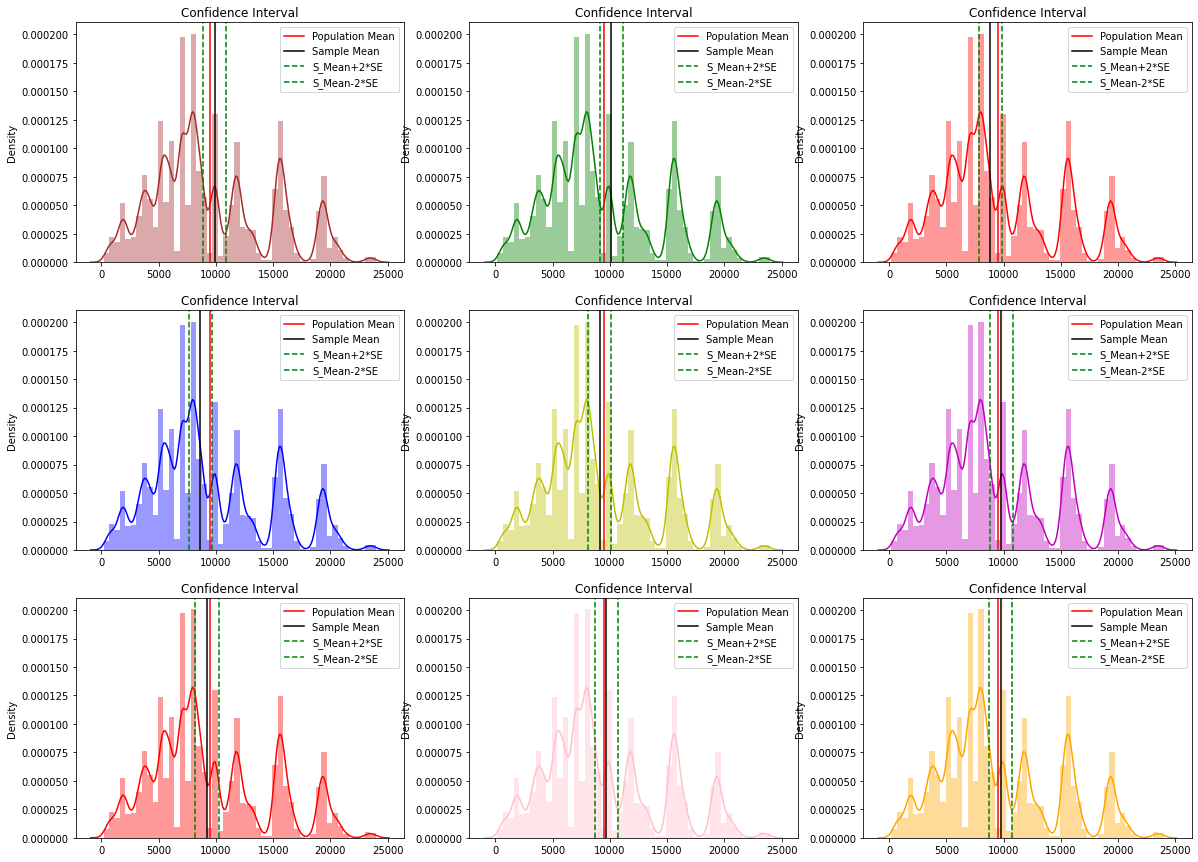

In [5]:
fig, axs = plt.subplots(3, 3,  figsize=(20, 15))
plt_grid = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1), (2,2)]
clr = ['brown', 'g', 'r', 'blue', 'y', 'm', 'r', 'pink', 'orange']
sample = []
for i in range(0,9):
  sample.append(random.sample(list(data_male), 100))
  Confidence_Interval(data_male, np.array(sample[i]).mean(), np.array(data_male).std(), plt_grid[i][0], plt_grid[i][1], clr[i])

In [15]:
table = PrettyTable(["#samples", "Sample Size", "Sample mean", "Population Std","Left C.I","Right C.I","Population mean","Catch"])
male_population_mean = np.array(data_male).mean()
male_population_std = np.array(data_male).std()

for i in range(9):
  sample = random.sample(list(data_male), 100)
  sample_mean = np.array(sample).mean()
  sample_std = np.array(sample).std()
  left_limit = np.round(sample_mean - 2*male_population_std/np.sqrt(len(sample)), 3)
  right_limit = np.round(sample_mean + 2*male_population_std/np.sqrt(len(sample)), 3)
                        
  row = []
  row.append(i+1)
  row.append(len(sample))
  row.append(sample_mean)
  row.append(male_population_std)
  row.append(left_limit)
  row.append(right_limit)
  row.append(male_population_mean)
  row.append(male_population_mean > left_limit and male_population_mean < right_limit)

  table.add_row(row)
print(table)

+----------+-------------+-------------+-------------------+----------+-----------+-------------------+-------+
| #samples | Sample Size | Sample mean |   Population Std  | Left C.I | Right C.I |  Population mean  | Catch |
+----------+-------------+-------------+-------------------+----------+-----------+-------------------+-------+
|    1     |     100     |   10119.76  | 5051.051025629941 | 9109.55  |  11129.97 | 9504.771712960679 |  True |
|    2     |     100     |   9644.14   | 5051.051025629941 | 8633.93  |  10654.35 | 9504.771712960679 |  True |
|    3     |     100     |   9103.57   | 5051.051025629941 | 8093.36  |  10113.78 | 9504.771712960679 |  True |
|    4     |     100     |   8838.15   | 5051.051025629941 | 7827.94  |  9848.36  | 9504.771712960679 |  True |
|    5     |     100     |   9518.36   | 5051.051025629941 | 8508.15  |  10528.57 | 9504.771712960679 |  True |
|    6     |     100     |   9777.69   | 5051.051025629941 | 8767.48  |  10787.9  | 9504.771712960679 | 